# DATA ANALYSIS

In [2]:
import pandas as pd

In [3]:
email_df=pd.read_csv('email_table.csv')
email_opened_df=pd.read_csv('email_opened_table.csv')
email_clicked_df=pd.read_csv('link_clicked_table.csv')

In [4]:
email_df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [5]:
email_opened_df.head()

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [6]:
email_clicked_df.head()

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


In [7]:
email_opened_df['email_opened']=1
email_clicked_df['email_clicked']=1

In [8]:
email_df.isna().sum()

email_id               0
email_text             0
email_version          0
hour                   0
weekday                0
user_country           0
user_past_purchases    0
dtype: int64

In [9]:
df=email_df.merge(email_opened_df, on='email_id',how='outer')

In [10]:
df=df.merge(email_clicked_df,on='email_id',how='outer')

In [11]:
df.isna().sum()

email_id                   0
email_text                 0
email_version              0
hour                       0
weekday                    0
user_country               0
user_past_purchases        0
email_opened           89655
email_clicked          97881
dtype: int64

In [12]:
df.email_opened=df.email_opened.fillna(0)

In [13]:
df.email_clicked=df.email_clicked.fillna(0)

In [14]:
df2=df.copy(deep=True)

In [15]:
df

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,email_clicked
0,85120,short_email,personalized,2,Sunday,US,5,0.0,0.0
1,966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,0.0,0.0
3,493711,short_email,generic,6,Monday,UK,1,0.0,0.0
4,106887,long_email,generic,14,Monday,US,6,0.0,0.0
...,...,...,...,...,...,...,...,...,...
99995,803504,short_email,personalized,4,Monday,US,5,0.0,0.0
99996,899722,long_email,personalized,7,Saturday,US,1,0.0,0.0
99997,449610,long_email,personalized,11,Saturday,UK,6,0.0,0.0
99998,72497,short_email,generic,10,Monday,UK,0,0.0,0.0


In [16]:
df.isna().sum()

email_id               0
email_text             0
email_version          0
hour                   0
weekday                0
user_country           0
user_past_purchases    0
email_opened           0
email_clicked          0
dtype: int64

In [17]:
df.groupby('email_version')[['email_clicked']].value_counts()

email_version  email_clicked
generic        0.0              49449
               1.0                760
personalized   0.0              48432
               1.0               1359
Name: count, dtype: int64

In [18]:
version_stats = df.groupby(['email_version', 'email_clicked']).size().unstack(fill_value=0)
version_stats.columns = ['Not Clicked', 'Clicked']
version_stats['Total'] = version_stats.sum(axis=1)
version_stats['CTR (%)'] = (version_stats['Clicked'] / version_stats['Total']) * 100

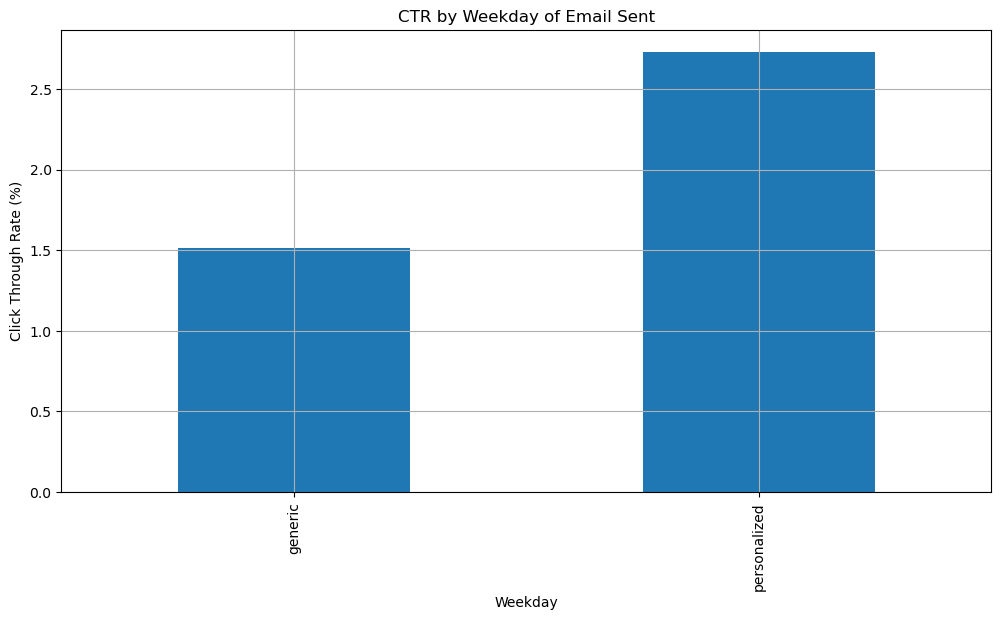

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

version_stats['CTR (%)'].plot(kind='bar', figsize=(12, 6))
plt.title('CTR by Weekday of Email Sent')
plt.xlabel('Weekday')
plt.ylabel('Click Through Rate (%)')
plt.grid(True)

It can be observed that personalized mails have way more click through rate

In [20]:
df.groupby('email_text')[['email_clicked']].value_counts()

email_text   email_clicked
long_email   0.0              49344
             1.0                932
short_email  0.0              48537
             1.0               1187
Name: count, dtype: int64

In [21]:
text_stats = df.groupby(['email_text', 'email_clicked']).size().unstack(fill_value=0)
text_stats.columns = ['Not Clicked', 'Clicked']
text_stats['Total'] = text_stats.sum(axis=1)
text_stats['CTR (%)'] = (text_stats['Clicked'] / text_stats['Total']) * 100

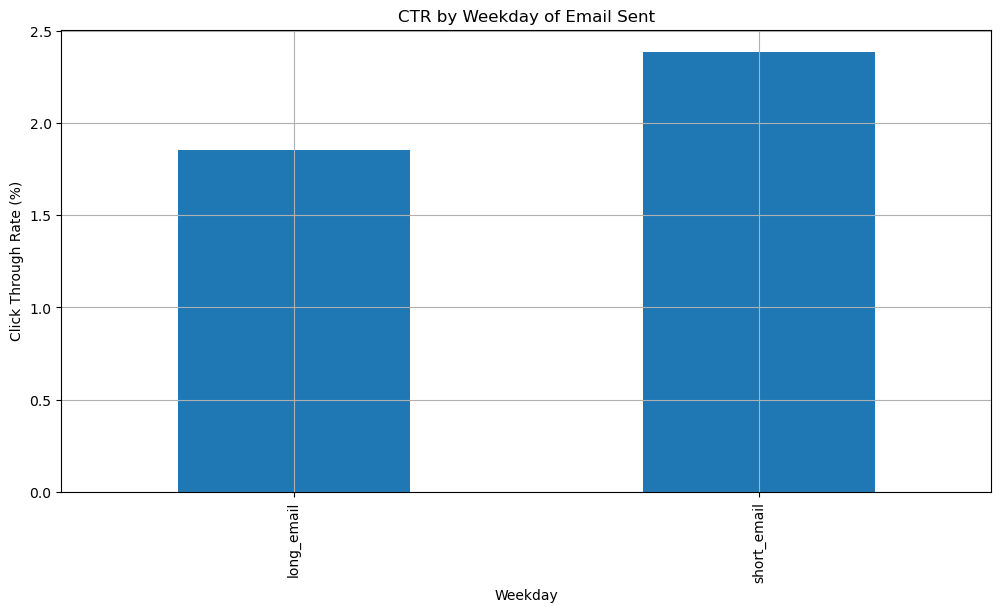

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

text_stats['CTR (%)'].plot(kind='bar', figsize=(12, 6))
plt.title('CTR by Weekday of Email Sent')
plt.xlabel('Weekday')
plt.ylabel('Click Through Rate (%)')
plt.grid(True)

Here, one may observe that short text mail has more chance of getting clicked than long ones. 

In [23]:
df.groupby('weekday')[['email_clicked']].value_counts()

weekday    email_clicked
Friday     0.0              13978
           1.0                199
Monday     0.0              14034
           1.0                329
Saturday   0.0              14309
           1.0                260
Sunday     0.0              14146
           1.0                241
Thursday   0.0              13928
           1.0                349
Tuesday    0.0              13791
           1.0                352
Wednesday  0.0              13695
           1.0                389
Name: count, dtype: int64

In [24]:
daywise_stats = df.groupby(['weekday', 'email_clicked']).size().unstack(fill_value=0)
daywise_stats.columns = ['Not Clicked', 'Clicked']
daywise_stats['Total'] = daywise_stats.sum(axis=1)
daywise_stats['CTR (%)'] = (daywise_stats['Clicked'] / daywise_stats['Total']) * 100


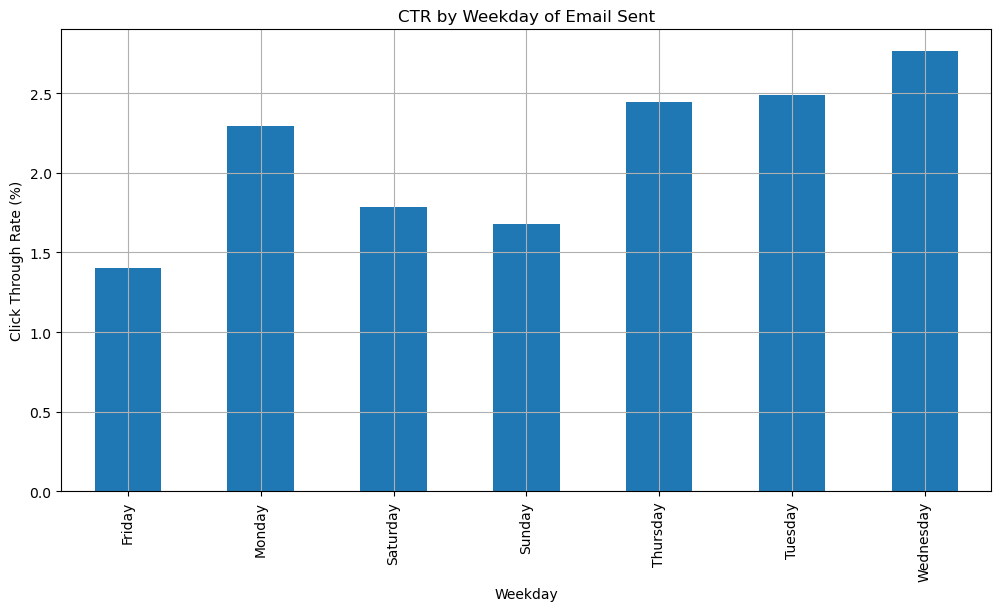

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

daywise_stats['CTR (%)'].plot(kind='bar', figsize=(12, 6))
plt.title('CTR by Weekday of Email Sent')
plt.xlabel('Weekday')
plt.ylabel('Click Through Rate (%)')
plt.grid(True)


During weekends, generally, people are clicking the link less as compared to working days. The CTR is found to be maximum from Tuesday to Thursday, being the midweek. 

In [26]:
df.groupby('hour')[['email_clicked']].value_counts()

hour  email_clicked
1     0.0              2654
      1.0                49
2     0.0              3616
      1.0                60
3     0.0              4520
      1.0                90
4     0.0              5531
      1.0                91
5     0.0              6433
      1.0               118
6     0.0              7337
      1.0               128
7     0.0              8054
      1.0               150
8     0.0              8239
      1.0               159
9     0.0              8309
      1.0               220
10    0.0              7949
      1.0               231
11    0.0              7280
      1.0               203
12    0.0              6341
      1.0               167
13    0.0              5470
      1.0               111
14    0.0              4485
      1.0                95
15    0.0              3406
      1.0                87
16    0.0              2695
      1.0                64
17    0.0              1858
      1.0                35
18    0.0              1398


In [27]:
hourly_stats = df.groupby(['hour', 'email_clicked']).size().unstack(fill_value=0)
hourly_stats.columns = ['Not Clicked', 'Clicked']
hourly_stats['Total'] = hourly_stats.sum(axis=1)
hourly_stats['CTR (%)'] = (hourly_stats['Clicked'] / hourly_stats['Total']) * 100

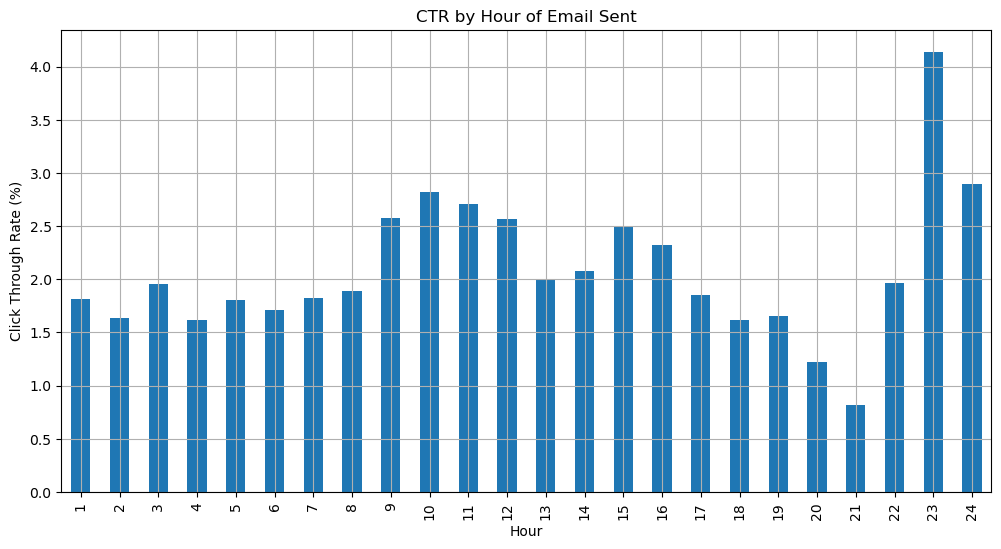

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

hourly_stats['CTR (%)'].plot(kind='bar', figsize=(12, 6))
plt.title('CTR by Hour of Email Sent')
plt.xlabel('Hour')
plt.ylabel('Click Through Rate (%)')
plt.grid(True)


We may infer that usually the emails sent between 10 to 12 and 22 to 24 have more probability of getting the link clicked, so emails should be sent in this timeframe more. We can segregate these timings as favourable ones for our prediction model.

In [29]:
df.groupby('user_country')['email_clicked'].value_counts()

user_country  email_clicked
ES            0.0               9884
              1.0                 83
FR            0.0               9915
              1.0                 80
UK            0.0              19447
              1.0                492
US            0.0              58635
              1.0               1464
Name: count, dtype: int64

In [30]:
df.groupby('email_opened')['email_clicked'].value_counts()

email_opened  email_clicked
0.0           0.0              89605
              1.0                 50
1.0           0.0               8276
              1.0               2069
Name: count, dtype: int64

Here, we may observe an anomaly that even when the email is not opened, the link has been clicked. Now, there can be some other possible reasons behind it like maybe the user even without the influence of the mail clicked the link to the website from somewhere else.
But we may also infer that almost a quarter of people who had opened the mail clicked on the link. 
Now, it is better to send emails to those who at least open them rather than sending the email randomly. 

In [31]:
df.groupby('user_past_purchases')[['email_opened','email_clicked']].value_counts()

user_past_purchases  email_opened  email_clicked
0                    0.0           0.0              13340
                     1.0           0.0                530
                     0.0           1.0                  5
                     1.0           1.0                  2
1                    0.0           0.0              12468
                                                    ...  
20                   0.0           0.0                  7
                     1.0           0.0                  4
21                   1.0           1.0                  2
                     0.0           0.0                  2
22                   1.0           1.0                  1
Name: count, Length: 74, dtype: int64

Conclusion and Strategy Recommendation:

Based on the analysis of the dataset, it is evident that a more targeted email marketing strategy can significantly improve user engagement compared to random email dispatches. The following insights should be incorporated into the campaign design to enhance the click-through rate (CTR):

Target Audience: Prioritize sending emails to users who have previously made purchases on the platform, as they are more likely to engage with future communications.

Optimal Timing: Schedule email sends during favorable time windows, particularly during office hours (10:00–12:00) and late-night hours (22:00–24:00), when user engagement tends to be higher.

Day of the Week: Increase the frequency of email campaigns during midweek (e.g., Tuesday to Thursday), which shows higher interaction rates.

Content Personalization: Use personalized messages with concise, compelling text to quickly capture and retain the recipient’s attention.

Implementing this data-driven approach is likely to result in a measurable increase in CTR for the website links embedded within the emails.

In [32]:
df = pd.get_dummies(df, columns=['email_text','email_version'])

In [33]:
df = pd.get_dummies(df, columns=['weekday','user_country'])

In [34]:
len(email_df)

100000

In [35]:
Open_Rate=len(email_opened_df)/len(email_df)

In [36]:
Click_Rate=len(email_clicked_df)/len(email_df)

In [37]:
print(Open_Rate)
print(Click_Rate)

0.10345
0.02119


In [38]:
df['is_favorable_hour'] = df['hour'].apply(lambda x: 1 if (10 <= x <= 12 or 22 <= x <= 24) else 0)

In [39]:
df

,email_id,hour,user_past_purchases,email_opened,email_clicked,email_text_long_email,email_text_short_email,email_version_generic,email_version_personalized,weekday_Friday,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,user_country_ES,user_country_FR,user_country_UK,user_country_US,is_favorable_hour
0,85120,2,5,0.0,0.0,False,True,False,True,False,...,False,True,False,False,False,False,False,False,True,0
1,966622,12,2,1.0,1.0,True,False,False,True,False,...,False,True,False,False,False,False,False,True,False,1
2,777221,11,2,0.0,0.0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,True,1
3,493711,6,1,0.0,0.0,False,True,True,False,False,...,False,False,False,False,False,False,False,True,False,0
4,106887,14,6,0.0,0.0,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,803504,4,5,0.0,0.0,False,True,False,True,False,...,False,False,False,False,False,False,False,False,True,0
99996,899722,7,1,0.0,0.0,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,0
99997,449610,11,6,0.0,0.0,True,False,False,True,False,...,True,False,False,False,False,False,False,True,False,1
99998,72497,10,0,0.0,0.0,False,True,True,False,False,...,False,False,False,False,False,False,False,True,False,1


In [40]:
df.drop(columns=['hour','email_id'],inplace=True)

In [41]:
df

,user_past_purchases,email_opened,email_clicked,email_text_long_email,email_text_short_email,email_version_generic,email_version_personalized,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,user_country_ES,user_country_FR,user_country_UK,user_country_US,is_favorable_hour
0,5,0.0,0.0,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,0
1,2,1.0,1.0,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,1
2,2,0.0,0.0,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,1
3,1,0.0,0.0,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False,0
4,6,0.0,0.0,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5,0.0,0.0,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,0
99996,1,0.0,0.0,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,0
99997,6,0.0,0.0,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,1
99998,0,0.0,0.0,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False,1


In [42]:
X = df.drop(['email_clicked', 'email_opened'], axis=1)
y = df['email_clicked']

In [43]:
y.value_counts()

email_clicked
0.0    97881
1.0     2119
Name: count, dtype: int64

Clearly, we have imbalanced data. As we need a clear picture, we should go for sampling of the data. 

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [45]:
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Resampling using SMOTE (Optional but good)
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [46]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

📊 Random Forest Metrics:
ROC-AUC: 0.6071896975310547
              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83     19576
         1.0       0.03      0.44      0.06       424

    accuracy                           0.72     20000
   macro avg       0.51      0.58      0.45     20000
weighted avg       0.96      0.72      0.82     20000



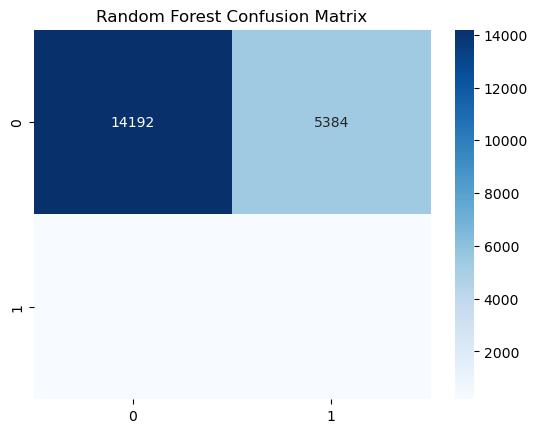

In [47]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_resampled, y_resampled)

rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

print("📊 Random Forest Metrics:")
print("ROC-AUC:", roc_auc_score(y_test, rf_probs))
print(classification_report(y_test, rf_preds))

sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()


Low precision

In [48]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)


In [49]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rfc = RandomForestClassifier(class_weight='balanced', random_state=42)
rs = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=20, scoring='roc_auc', cv=3, random_state=42, n_jobs=-1)
rs.fit(X_resampled, y_resampled)

best_rf = rs.best_estimator_


In [50]:
best_rf

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       max_features='log2', min_samples_split=5,
                       n_estimators=200, random_state=42)

📊 Random Forest Metrics:
ROC-AUC: 0.6273199976289796
              precision    recall  f1-score   support

         0.0       0.98      0.73      0.84     19576
         1.0       0.03      0.44      0.06       424

    accuracy                           0.72     20000
   macro avg       0.51      0.58      0.45     20000
weighted avg       0.96      0.72      0.82     20000



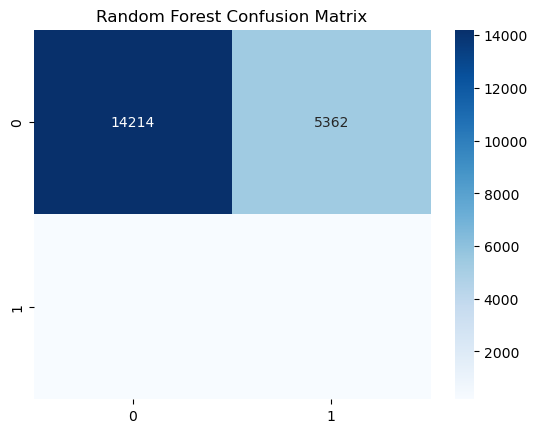

In [51]:
rs_preds = best_rf.predict(X_test)
rs_probs = best_rf.predict_proba(X_test)[:, 1]

print("📊 Random Forest Metrics:")
print("ROC-AUC:", roc_auc_score(y_test, rs_probs))
print(classification_report(y_test, rs_preds))

sns.heatmap(confusion_matrix(y_test, rs_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

Low precision

In [52]:
import sys
!{sys.executable} -m pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [53]:
import xgboost as xgb
from xgboost import XGBClassifier

In [54]:
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

xgb_model.fit(X_resampled, y_resampled)

# 🔹 Evaluate
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

print("📊 XGBoost with SMOTE Metrics:")
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

C:\Users\ADITI\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [14:40:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 XGBoost with SMOTE Metrics:
ROC-AUC: 0.7017853975989081
              precision    recall  f1-score   support

         0.0       0.99      0.66      0.79     19576
         1.0       0.04      0.62      0.07       424

    accuracy                           0.66     20000
   macro avg       0.51      0.64      0.43     20000
weighted avg       0.97      0.66      0.78     20000

Confusion Matrix:
 [[12991  6585]
 [  160   264]]


Low precision

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
import numpy as np

# Assuming: model is trained, and you have test data: X_test, y_test
y_proba = xgb_model.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.05, 0.91, 0.01)
results = []

print("📊 Threshold Tuning Results (prioritizing Precision):\n")
for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    precision = precision_score(y_test, y_pred_thresh, zero_division=0)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    acc = accuracy_score(y_test, y_pred_thresh)
    results.append((thresh, precision, recall, f1, acc))
    print(f"Threshold: {thresh:.2f} | Precision: {precision:.3f} | Recall: {recall:.3f} | F1: {f1:.3f} | Accuracy: {acc:.3f}")

# Get the best threshold based on highest precision
best = max(results, key=lambda x: x[1])  # max precision
best_thresh = best[0]

print("\n✅ Best Threshold for Precision:", best_thresh)

# Final evaluation with best threshold
y_pred_best = (y_proba >= best_thresh).astype(int)
print("\n🔍 Classification Report at Best Threshold:\n")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


📊 Threshold Tuning Results (prioritizing Precision):

Threshold: 0.05 | Precision: 0.026 | Recall: 0.969 | F1: 0.050 | Accuracy: 0.222
Threshold: 0.06 | Precision: 0.026 | Recall: 0.969 | F1: 0.051 | Accuracy: 0.241
Threshold: 0.07 | Precision: 0.026 | Recall: 0.955 | F1: 0.051 | Accuracy: 0.254
Threshold: 0.08 | Precision: 0.027 | Recall: 0.955 | F1: 0.053 | Accuracy: 0.272
Threshold: 0.09 | Precision: 0.027 | Recall: 0.948 | F1: 0.053 | Accuracy: 0.285
Threshold: 0.10 | Precision: 0.028 | Recall: 0.946 | F1: 0.054 | Accuracy: 0.295
Threshold: 0.11 | Precision: 0.028 | Recall: 0.939 | F1: 0.054 | Accuracy: 0.309
Threshold: 0.12 | Precision: 0.028 | Recall: 0.934 | F1: 0.055 | Accuracy: 0.314
Threshold: 0.13 | Precision: 0.028 | Recall: 0.925 | F1: 0.055 | Accuracy: 0.321
Threshold: 0.14 | Precision: 0.028 | Recall: 0.917 | F1: 0.055 | Accuracy: 0.332
Threshold: 0.15 | Precision: 0.029 | Recall: 0.910 | F1: 0.055 | Accuracy: 0.342
Threshold: 0.16 | Precision: 0.029 | Recall: 0.901 | F1

Higher precision but quite low recall

import numpy as np
from sklearn.metrics import fbeta_score, classification_report, confusion_matrix

# y_pred_proba should be the predicted probabilities for class 1 (clicked)
# y_test should be your true labels from the test set

thresholds = np.arange(0.1, 0.95, 0.05)
f2_scores = []

for t in thresholds:
    y_pred_thresh = (y_pred_proba >= t).astype(int)
    f2 = fbeta_score(y_test, y_pred_thresh, beta=2)
    f2_scores.append(f2)

# Find best threshold
best_f2_index = np.argmax(f2_scores)
best_f2_threshold = thresholds[best_f2_index]

# Predict using best threshold
y_best_thresh = (y_pred_proba >= best_f2_threshold).astype(int)

# Final evaluation
print(f"🎯 Best Threshold (F2): {best_f2_threshold}")
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_best_thresh))
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_best_thresh))


In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Train the model
nb_model = MultinomialNB()
nb_model.fit(X_resampled, y_resampled)

# Predict
y_pred = nb_model.predict(X_test)
y_prob = nb_model.predict_proba(X_test)[:, 1]

# Evaluate
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


ROC-AUC: 0.7212264391900749
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.69      0.81     19576
         1.0       0.04      0.64      0.08       424

    accuracy                           0.69     20000
   macro avg       0.52      0.66      0.44     20000
weighted avg       0.97      0.69      0.80     20000

Confusion Matrix:
 [[13451  6125]
 [  154   270]]


Till now, Naive Bayes model has done the best work in terms of Recall of 1 and 0 class. But precision is still very low

In [59]:
import numpy as np
from sklearn.metrics import precision_score, classification_report, confusion_matrix

# Step 1: Get predicted probabilities
y_proba = nb_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Step 2: Evaluate precision across thresholds
thresholds = np.arange(0.0, 1.01, 0.05)
best_threshold = 0
best_precision = 0

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    precision = precision_score(y_test, y_pred_thresh, zero_division=0)
    if precision > best_precision:
        best_precision = precision
        best_threshold = thresh

# Step 3: Final predictions at best threshold
y_pred_final = (y_proba >= best_threshold).astype(int)

# Step 4: Print Results
print(f"✅ Best Threshold for Precision: {best_threshold}")
print("\n🔍 Classification Report at Best Threshold:\n")
print(classification_report(y_test, y_pred_final, digits=4))
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))


✅ Best Threshold for Precision: 0.9500000000000001

🔍 Classification Report at Best Threshold:

              precision    recall  f1-score   support

         0.0     0.9791    0.9985    0.9887     19576
         1.0     0.1714    0.0142    0.0261       424

    accuracy                         0.9777     20000
   macro avg     0.5752    0.5063    0.5074     20000
weighted avg     0.9619    0.9777    0.9683     20000

📊 Confusion Matrix:
[[19547    29]
 [  418     6]]


Although we are having having a less recall that is catching less potential clickers out of all the actual clickers, our goal of not just sending mails randomly is met because of a great improvement in the precision. By data analysis, we also figured out our new strategy for achieving higher clicks. 
Therefore, this can be a model we may use for better CTR.